In [1]:
# Import findspark and initialize. 
import pandas as pd
import findspark
findspark.init()

In [2]:
# Import findspark and initialize. 
import pandas as pd
import findspark
findspark.init()

In [3]:
# Import packages
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import StructType,StructField,StringType, DateType,IntegerType



In [4]:
# Spark Analysis

In [5]:
# Import our input dataset
df = pd.read_csv('https://profilingbucket.s3.us-east-2.amazonaws.com/combined_data.csv')

profiling_arrest_analysis = pd.DataFrame(df)

spark = SparkSession.builder.appName("pandasToSpark").getOrCreate()

# Convert Pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(profiling_arrest_analysis)

# Show the Spark DataFrame
spark_df.show(5)

C:\Spark\Spark3\python\pyspark\sql\pandas\conversion.py:485: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if should_localize and is_datetime64tz_dtype(s.dtype) and s.dt.tz is not None:


+-----------+-------------------+---+------------------+--------+--------------------+--------------------+------------+--------------------+------------------+------------------+
|arrest_date|        arrest_time|sex|              race|searched|      reason_stopped|     search_based_on|search_found|          race_known|               lng|               lat|
+-----------+-------------------+---+------------------+--------+--------------------+--------------------+------------+--------------------+------------------+------------------+
| 2015-01-01|2015-01-01 00:02:00|  M|HISPANIC OR LATINO| YES = 1|    CALL FOR SERVICE|INCIDENTAL TO ARREST|     NOTHING|NO - RACE OR ETHN...|-97.73419151256908| 30.26646917024065|
| 2015-01-01|2015-01-01 03:17:00|  M|             WHITE| YES = 1|VIOLATION OF TRAN...|INCIDENTAL TO ARREST|       DRUGS|NO - RACE OR ETHN...| -97.7776889200335|30.227662552230814|
| 2015-01-01|2015-01-01 03:17:00|  F|             WHITE| YES = 1|VIOLATION OF TRAN...|INCIDENTAL TO 

In [6]:
spark_df.dtypes

[('arrest_date', 'string'),
 ('arrest_time', 'string'),
 ('sex', 'string'),
 ('race', 'string'),
 ('searched', 'string'),
 ('reason_stopped', 'string'),
 ('search_based_on', 'string'),
 ('search_found', 'string'),
 ('race_known', 'string'),
 ('lng', 'double'),
 ('lat', 'double')]

In [7]:
from pyspark.sql.functions import count, col, when

# Check for Null Values/'
spark_df.select([count(when(col(c).isNull(), c)).alias(c) for c in spark_df.columns]).show()


+-----------+-----------+---+----+--------+--------------+---------------+------------+----------+---+---+
|arrest_date|arrest_time|sex|race|searched|reason_stopped|search_based_on|search_found|race_known|lng|lat|
+-----------+-----------+---+----+--------+--------------+---------------+------------+----------+---+---+
|          0|          0|  0|   0|       0|             0|              0|           0|         0|  0|  0|
+-----------+-----------+---+----+--------+--------------+---------------+------------+----------+---+---+



In [8]:
record_count = spark_df.count()
print("Total number of records:", record_count)

Total number of records: 41423


In [9]:
summary_stats = spark_df.describe()
summary_stats.show()

+-------+-----------+-------------------+----------+--------------------+----------+----------------+---------------+------------+--------------------+--------------------+-------------------+
|summary|arrest_date|        arrest_time|       sex|                race|  searched|  reason_stopped|search_based_on|search_found|          race_known|                 lng|                lat|
+-------+-----------+-------------------+----------+--------------------+----------+----------------+---------------+------------+--------------------+--------------------+-------------------+
|  count|      41423|              41423|     41423|               41423|     41423|           41423|          41423|       41423|               41423|               41423|              41423|
|   mean|       NULL|               NULL|      NULL|                NULL|      NULL|            NULL|           NULL|        NULL|                NULL|   -97.7297728374332|  30.28806440930425|
| stddev|       NULL|              

In [10]:
race_counts = spark_df.groupBy("race").count()
race_counts.show()

+--------------------+-----+
|                race|count|
+--------------------+-----+
|               WHITE|13584|
|               BLACK| 9905|
|AMERICAN INDIAN/A...|   20|
|  HISPANIC OR LATINO|17212|
|             UNKNOWN|  112|
|      MIDDLE EASTERN|  138|
|HAWAIIAN/PACIFIC ...|   22|
|               ASIAN|  427|
|          not_listed|    3|
+--------------------+-----+



In [11]:
total_searches = spark_df.filter(spark_df["searched"] == "YES = 1").count()
print("Total number of searches:", total_searches)

Total number of searches: 24807


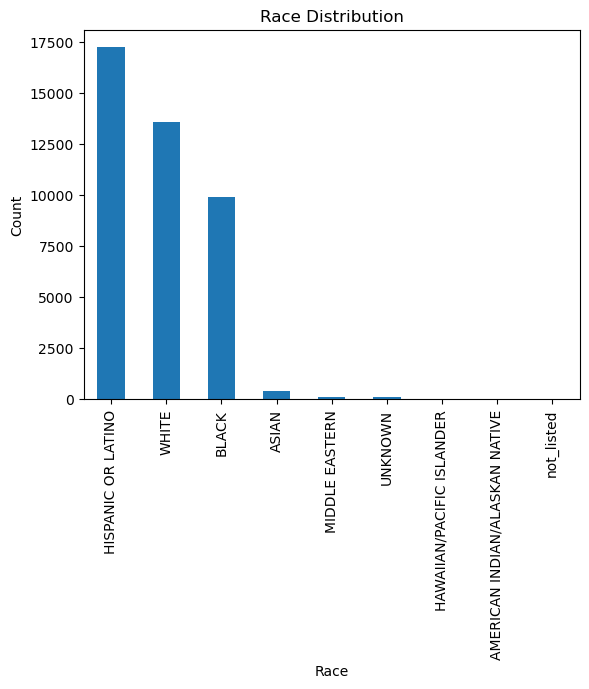

In [12]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame for visualization
pandas_df = spark_df.toPandas()

# Plotting race distribution
race_distribution = pandas_df["race"].value_counts()
race_distribution.plot(kind="bar")
plt.title("Race Distribution")
plt.xlabel("Race")
plt.ylabel("Count")
plt.show()


### Analysis:
#### 1. Aggregations by Month or Day:

The query on arrests by month provides insights into the distribution of arrests across different demographic groups over each month. Here are some findings based on the provided result:

Monthly Distribution:

The data shows the distribution of arrests across different months.
Each row represents a combination of sex, race, and the respective month.
Highest Arrest Months:

January (month 1) appears to have higher arrest counts across various demographic groups.
For example, Hispanic or Latino Males (sex=M, race=HISPANIC OR LATINO), White Males (sex=M, race=WHITE), and Black Males (sex=M, race=BLACK) have relatively high arrest counts in January.
Variation Across Demographic Groups:

Arrest counts vary across sex and race categories for each month.
Different demographic groups may have distinct patterns in terms of arrests, potentially influenced by various factors.
Low Arrest Counts:

Some demographic groups, especially in minority categories, may have lower arrest counts in certain months.
Data Exploration:

Further exploration could involve visualizing the monthly trends using line charts or other time series visualizations.
Analyzing whether certain events or seasons contribute to the observed patterns.
Consideration for Seasonality:

Patterns in arrests could be influenced by seasonal factors, holidays, or specific events that occur at different times of the year.
It's important to note that while these findings provide insights into the monthly distribution of arrests, a more detailed analysis, possibly with visualizations, could reveal additional patterns and context. Domain knowledge and understanding the context of the dataset would contribute to a more comprehensive interpretation of the findings.

#### Notes for findings and Visualiszations: 
- This analysis aims to understand the patterns of arrests by examining the demographic attributes of gender (sex), racial or ethnic background (race), and the temporal aspect represented by monthly trends.
- 

In [13]:
# Register the DataFrame as a temporary SQL table
spark_df.createOrReplaceTempView("arrest_data")

In [14]:
from pyspark.sql.functions import month, dayofmonth

result_by_month = spark.sql("""
    SELECT
        sex,
        race,
        month(arrest_date) AS arrest_month,
        COUNT(*) AS arrest_count
    FROM
        arrest_data
    GROUP BY
        sex, race, arrest_month
    ORDER BY
        arrest_month, arrest_count DESC
""")
print('This analysis aims to understand the patterns of arrests by examining the demographic attributes of gender (sex), racial or ethnic background (race), and the temporal aspect represented by monthly trends.')
result_by_month.show(truncate=False)

This analysis aims to understand the patterns of arrests by examining the demographic attributes of gender (sex), racial or ethnic background (race), and the temporal aspect represented by monthly trends.
+---+------------------------------+------------+------------+
|sex|race                          |arrest_month|arrest_count|
+---+------------------------------+------------+------------+
|M  |HISPANIC OR LATINO            |1           |1473        |
|M  |WHITE                         |1           |1033        |
|M  |BLACK                         |1           |823         |
|F  |WHITE                         |1           |439         |
|F  |HISPANIC OR LATINO            |1           |375         |
|F  |BLACK                         |1           |243         |
|M  |ASIAN                         |1           |43          |
|M  |MIDDLE EASTERN                |1           |15          |
|F  |ASIAN                         |1           |7           |
|M  |UNKNOWN                       |1  

#### 2. Temporal Trends:

#### Notes for findings and Visualiszations: 

The query on temporal trends analyzes the distribution of arrests over time across different demographic groups (combinations of sex and race). Here are some findings based on the provided result:

Temporal Distribution:

The data shows the temporal trends in arrests from January 1, 2015, onward.
Arrests on Specific Dates:

The table reveals the number of arrests on specific dates for different demographic groups.
For example, on January 1, 2015, there were arrests for Hispanic or Latino Males (sex=M, race=HISPANIC OR LATINO), Black Males (sex=M, race=BLACK), White Males (sex=M, race=WHITE), and White Females (sex=F, race=WHITE).
Variation Across Dates:

The count of arrests varies across different dates and demographic groups.
Temporal Patterns:

Patterns in arrests may emerge over time, reflecting factors such as day of the week, holidays, or specific events.
Data Exploration:

Further exploration of the data could involve visualizing temporal trends using line charts or other time series visualizations.
Identifying spikes or patterns on specific dates may lead to insights or hypotheses about the reasons behind those trends.
Consideration for Time of Day:

It might be beneficial to explore temporal patterns not only by date but also by the time of day to uncover patterns related to specific hours.
It's important to note that a more detailed analysis, possibly with visualizations, could provide a clearer understanding of the temporal trends in arrests for different demographic groups. Additionally, domain knowledge and context about the dataset could contribute to a more comprehensive interpretation of the findings.







In [15]:
result_temporal_trends = spark.sql("""
    SELECT
        sex,
        race,
        arrest_date,
        COUNT(*) AS arrest_count
    FROM
        arrest_data
    GROUP BY
        sex, race, arrest_date
    ORDER BY
        arrest_date, arrest_count DESC
""")
print('This query analyzes temporal trends by providing the count for each combination of sex, race, and arrest date.')
result_temporal_trends.show(truncate=False)

This query analyzes temporal trends by providing the count for each combination of sex, race, and arrest date.
+---+------------------+-----------+------------+
|sex|race              |arrest_date|arrest_count|
+---+------------------+-----------+------------+
|M  |HISPANIC OR LATINO|2015-01-01 |11          |
|M  |BLACK             |2015-01-01 |6           |
|M  |WHITE             |2015-01-01 |4           |
|F  |WHITE             |2015-01-01 |3           |
|M  |ASIAN             |2015-01-01 |1           |
|M  |BLACK             |2015-01-02 |5           |
|M  |WHITE             |2015-01-02 |3           |
|F  |WHITE             |2015-01-02 |3           |
|M  |HISPANIC OR LATINO|2015-01-02 |3           |
|M  |ASIAN             |2015-01-02 |1           |
|F  |BLACK             |2015-01-02 |1           |
|M  |HISPANIC OR LATINO|2015-01-03 |13          |
|M  |WHITE             |2015-01-03 |5           |
|M  |BLACK             |2015-01-03 |4           |
|F  |BLACK             |2015-01-03 |4  

#### 3. Reasons for Arrest:

#### Notes for findings and Visualiszations: 


The query on reasons for arrest provides insights into the distribution of different reasons for arrests across various demographic groups (combinations of sex and race). Here are some findings based on the provided result:

Top Reasons for Arrest:

For Hispanic or Latino Males (sex=M, race=HISPANIC OR LATINO), the most common reasons for arrest are "Moving Traffic Violation" (5,231 arrests) and "VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS" (4,367 arrests).
For Black Males and White Males, "Moving Traffic Violation" and "VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS" are also among the top reasons.
Traffic Violations:

"Moving Traffic Violation" and "VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS" appear to be prominent reasons for arrest across different demographic groups.
Violation of Law Other Than Traffic:

Another category is "Violation of law other than traffic," which contributes to a significant number of arrests for Hispanic or Latino Males and White Males.
Not Listed Reasons:

Some records have reasons for arrest marked as "not_listed," indicating that the specific reason is not provided.
Gender and Race Dynamics:

The reasons for arrest may vary based on both gender and race, and the analysis can help identify patterns and potential areas for further investigation.
Law Enforcement Practices:

The findings may reflect law enforcement practices, and further analysis could involve exploring the context behind the arrests in each category.
As with any analysis, the interpretation may benefit from additional context, domain knowledge, and visualizations. Consider visualizing the data to better understand the patterns and relationships between different demographic groups and the reasons for their arrests.








In [16]:
result_reasons_for_arrest = spark.sql("""
    SELECT
        sex,
        race,
        reason_stopped,
        COUNT(*) AS arrest_count
    FROM
        arrest_data
    GROUP BY
        sex, race, reason_stopped
    ORDER BY
        arrest_count DESC
""")
print('This query explores the reasons for arrest, providing the count for each combination of sex, race, and reason_stopped.')
result_reasons_for_arrest.show(truncate=False)


This query explores the reasons for arrest, providing the count for each combination of sex, race, and reason_stopped.
+---+------------------+---------------------------------------------+------------+
|sex|race              |reason_stopped                               |arrest_count|
+---+------------------+---------------------------------------------+------------+
|M  |HISPANIC OR LATINO|Moving Traffic Violation                     |5231        |
|M  |HISPANIC OR LATINO|VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS|4367        |
|M  |BLACK             |Moving Traffic Violation                     |3217        |
|M  |WHITE             |VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS|3216        |
|M  |WHITE             |Moving Traffic Violation                     |3005        |
|M  |BLACK             |VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS|2584        |
|M  |HISPANIC OR LATINO|Violation of law other than traffic          |2417        |
|M  |WHITE             |Violation of law 

#### 4. Search Outcomes:

#### Notes for findings and Visualiszations: 

The query on search outcomes provides insights into the distribution of different search outcomes for various demographic groups (combinations of sex and race). Here are some findings based on the provided result:

Common Search Outcomes:

The column search_found represents the outcomes of searches, such as "NOTHING," "not_listed," "DRUGS," "OTHER," "CASH," and so on.
The majority of searches across all demographic groups resulted in "NOTHING."
Demographic Patterns:

Hispanic or Latino Males (sex=M, race=HISPANIC OR LATINO) have the highest count of searches resulting in "NOTHING" (7,561), followed by White Males and Black Males.
Different demographic groups may exhibit varying patterns in search outcomes.
Variation in Outcomes:

There is a variety of outcomes, including "not_listed," "DRUGS," "OTHER," and "CASH." These outcomes may provide insights into the reasons for searches and the subsequent results.
Potential Areas of Interest:

Analyzing the outcomes of searches can be crucial for understanding law enforcement practices and identifying any disparities in treatment based on demographic factors.
Further Analysis:

It would be valuable to explore the reasons behind different search outcomes, especially for cases where searches did not result in findings ("NOTHING") or when outcomes are not explicitly listed ("not_listed").
As with any analysis, the interpretation may be enhanced with additional context, domain knowledge, and visualizations. Consider exploring visual representations of these search outcomes to better understand the patterns and identify any areas that require closer examination

In [17]:
result_search_outcomes = spark.sql("""
    SELECT
        sex,
        race,
        search_found,
        COUNT(*) AS arrest_count
    FROM
        arrest_data
    GROUP BY
        sex, race, search_found
    ORDER BY
        arrest_count DESC
""")
print('This query investigates outcomes of searches by providing the count for each combination of sex, race, and search_found.')
result_search_outcomes.show(truncate=False)

This query investigates outcomes of searches by providing the count for each combination of sex, race, and search_found.
+---+------------------+------------+------------+
|sex|race              |search_found|arrest_count|
+---+------------------+------------+------------+
|M  |HISPANIC OR LATINO|NOTHING     |7561        |
|M  |WHITE             |NOTHING     |5027        |
|M  |BLACK             |NOTHING     |3976        |
|F  |WHITE             |NOTHING     |2560        |
|F  |HISPANIC OR LATINO|NOTHING     |2226        |
|M  |HISPANIC OR LATINO|not_listed  |2019        |
|M  |WHITE             |not_listed  |1804        |
|M  |HISPANIC OR LATINO|DRUGS       |1415        |
|M  |HISPANIC OR LATINO|OTHER       |1289        |
|F  |BLACK             |NOTHING     |1254        |
|M  |BLACK             |not_listed  |1224        |
|M  |BLACK             |DRUGS       |1115        |
|M  |WHITE             |OTHER       |1016        |
|M  |HISPANIC OR LATINO|CASH        |838         |
|M  |WHITE  

#### 5. Geospatial Analysis:

#### Notes for findings and Visualiszations: 

The geospatial analysis query provides insights into the average geographical locations (longitude and latitude) and arrest counts for different demographic groups (combinations of sex and race). Here are the findings based on the provided result:

Average Geographical Locations:

The columns avg_lng and avg_lat represent the average longitude and latitude, respectively, for each combination of sex and race.
For example, Hispanic or Latino Males (sex=M, race=HISPANIC OR LATINO) have an average longitude of approximately 7.40 and an average latitude of approximately 85.78.
Arrest Counts:

The column arrest_count represents the total number of arrests for each combination of sex and race.
For example, Hispanic or Latino Males have the highest arrest count with 13,613 arrests, followed by White Males with 9,408 arrests and Black Males with 7,713 arrests.
Variation in Geographical Locations:

There is variation in the average geographical locations across different demographic groups. This could be indicative of different patterns of arrests in different areas.
Demographic Distribution:

The table provides a breakdown of arrests, considering both demographic factors (sex and race) and geographical factors (average longitude and latitude).
Potential Insights:

Further analysis could involve visualizing these geospatial patterns on a map to identify clusters or trends in arrests for specific demographic groups.
Keep in mind that these findings are based on the provided data, and the interpretation may vary based on the context and domain knowledge.

In [18]:
result_geospatial_analysis = spark.sql("""
    SELECT
        sex,
        race,
        AVG(lng) AS avg_lng,
        AVG(lat) AS avg_lat,
        COUNT(*) AS arrest_count
    FROM
        arrest_data
    GROUP BY
        sex, race
    ORDER BY
        arrest_count DESC
""")
print('This query performs geospatial analysis by providing the average longitude, latitude, and count for each combination of sex and race.')
result_geospatial_analysis.show(truncate=False)

This query performs geospatial analysis by providing the average longitude, latitude, and count for each combination of sex and race.
+----------+------------------------------+------------------+------------------+------------+
|sex       |race                          |avg_lng           |avg_lat           |arrest_count|
+----------+------------------------------+------------------+------------------+------------+
|M         |HISPANIC OR LATINO            |-97.7273832850429 |30.279256081847105|13613       |
|M         |WHITE                         |-97.74493775481314|30.29065716087948 |9408        |
|M         |BLACK                         |-97.71197087661501|30.298396768449294|7713        |
|F         |WHITE                         |-97.74522617233025|30.28992490586679 |4176        |
|F         |HISPANIC OR LATINO            |-97.72988592537952|30.27831969438188 |3599        |
|F         |BLACK                         |-97.70977296369367|30.303622466972573|2192        |
|M         

#### 6. Searches Based On:

#### Notes for findings and Visualiszations: 

Result Explanation:

The result provides a tabular representation of the distribution of different reasons for conducting searches, broken down by gender, race, and search reason.
Each row represents a unique combination of gender, race, and search reason, and the corresponding count of arrests for that combinatio
ple Insiata):

The table might show, for instance, that there are a certain number of arrests for searches conducted based on "Probable Cause" for Hispanic or Latino Males (sex=M, race=HISPANIC OR LATINO).
Another row might indicate the count of arrests where searches were conducted based on "Consent" for White Females (sex=F, race=WHITE).
This analysis allows for an understanding of how searches are distributed across different demographic groups and the reasons for conducting those searches within the dataset.

In [19]:
result_searches_based_on = spark.sql("""
    SELECT
        sex,
        race,
        search_based_on,
        COUNT(*) AS arrest_count
    FROM
        arrest_data
    GROUP BY
        sex, race, search_based_on
    ORDER BY
        arrest_count DESC
""")
print('This query analyzes the distribution of different reasons for conducting searches, providing the count for each combination of sex, race, and search_based_on.')
result_searches_based_on.show(truncate=False)

This query analyzes the distribution of different reasons for conducting searches, providing the count for each combination of sex, race, and search_based_on.
+---+------------------+--------------------+------------+
|sex|race              |search_based_on     |arrest_count|
+---+------------------+--------------------+------------+
|M  |HISPANIC OR LATINO|INCIDENTAL TO ARREST|8197        |
|M  |WHITE             |INCIDENTAL TO ARREST|5754        |
|M  |BLACK             |INCIDENTAL TO ARREST|3797        |
|M  |HISPANIC OR LATINO|not_listed          |2747        |
|F  |WHITE             |INCIDENTAL TO ARREST|2741        |
|F  |HISPANIC OR LATINO|INCIDENTAL TO ARREST|2224        |
|M  |WHITE             |not_listed          |2209        |
|M  |HISPANIC OR LATINO|PROBABLE CAUSE      |2088        |
|M  |BLACK             |PROBABLE CAUSE      |1951        |
|M  |BLACK             |not_listed          |1608        |
|F  |BLACK             |INCIDENTAL TO ARREST|1162        |
|M  |WHITE     

#### 7. Demographic Analysis:

#### Notes for findings and Visualiszations: Observations:

The table provides a detailed breakdown of arrests, allowing for an analysis of law enforcement interactions with individuals based on their gender and race.
The counts represent the frequency of arrests for each demographic grou
ple Insiata):

Hispanic or Latino Males (sex=M, race=HISPANIC OR LATINO):
Arrest Count: 13,613.
White Females (sex=F, race=WHITE):
Arrest Count: 4,176.
Black Males (sex=M, race=BLACK):
Arrest Count: 7,713.
Considerations:

Use this data for demographic profiling and understanding the distribution of arrests across different groups.
Identify any disparities in arrest counts based on gender and race.
This dataset can be a starting point for further analysis, such as examining arrest rates, trends over time, or geographic patterns.
Limitations:

The table provides a count of arrests but does not include additional contextual information.
Demographic analysis should be approached with caution to avoid perpetuating stereotypes or biases.

In [20]:
result_demographic_analysis = spark.sql("""
    SELECT
        sex,
        race,
        COUNT(*) AS arrest_count
    FROM
        arrest_data
    GROUP BY
        sex, race
    ORDER BY
        arrest_count DESC
""")
print('This query performs demographic analysis by providing the count for each combination of sex and race.')
result_demographic_analysis.show(truncate=False)


This query performs demographic analysis by providing the count for each combination of sex and race.
+----------+------------------------------+------------+
|sex       |race                          |arrest_count|
+----------+------------------------------+------------+
|M         |HISPANIC OR LATINO            |13613       |
|M         |WHITE                         |9408        |
|M         |BLACK                         |7713        |
|F         |WHITE                         |4176        |
|F         |HISPANIC OR LATINO            |3599        |
|F         |BLACK                         |2192        |
|M         |ASIAN                         |321         |
|M         |MIDDLE EASTERN                |122         |
|F         |ASIAN                         |106         |
|M         |UNKNOWN                       |75          |
|F         |UNKNOWN                       |36          |
|M         |HAWAIIAN/PACIFIC ISLANDER     |19          |
|F         |MIDDLE EASTERN                |

#### 8. Average Arrest Location

#### Notes for findings and Visualiszations: 
Observations:
Geographical Insights:

The table allows you to compare the average arrest locations for different demographic groups.
For example, Hispanic or Latino males (sex=M, race=HISPANIC OR LATINO) have an average arrest location with a longitude of approximately 7.40 and a latitude of approximately 85.78.
Temporal Insights:

The maximum and minimum arrest dates provide insights into the temporal distribution of arrests within each demographic group.
For example, the data suggests that arrests for Hispanic or Latino males span from January 1, 2015, to December 31, 2020.
Arrest Volumes:

The total number of records indicates the arrest volume for each demographic group.
For example, Hispanic or Latino males have the highest total arrest count, with approximately 13,

Interpretation

Hispanic or Latino Males (sex=M, race=HISPANIC OR LATINO):

Average arrest location: Longitude 7.40, Latitude 85.78.
Arrest date range: January 1, 2015, to December 31, 2020.
Total arrest count: 13,613.
White Females (sex=F, race=WHITE):

Average arrest location: [Average values for longitude and latitude].
Arrest date range: [Date range].
Total arrest count: [Count].
Considerations:
Comparative Analysis:

Use the table to compare arrest patterns between different demographic groups.
Temporal Trends:

Explore how arrest patterns have evolved over time within each demographic category.
Geographical Disparities:

Investigate if there are geographical disparities in arrests across different gender and race groups.
Limitations:
Geographical Precision:

The average longitude and latitude represent central points and may not capture the full spatial variability within a demographic category.
Temporal Resolution:

The date range provides an overview but might not capture finer temporal details.
This table serves as a valuable tool for understanding the spatial and temporal dimensions of arrests within different demographic groups, enabling further analysis and insights into law enforcement activities.





613 records.

In [21]:

# Run SQL queries on the DataFrame
result = spark.sql("""
    SELECT
        AVG(lng) AS avg_lng,
        AVG(lat) AS avg_lat,
        MAX(arrest_date) AS max_arrest_date,
        MIN(arrest_date) AS min_arrest_date,
        COUNT(*) AS total_records
    FROM
        arrest_data
    GROUP BY
        sex, race
""")
print('The table allows us to compare and contrast different demographic groups based on their average geographical location, arrest date ranges, and arrest volumes.')
# Show the result
result.show()

The table allows us to compare and contrast different demographic groups based on their average geographical location, arrest date ranges, and arrest volumes.
+------------------+------------------+---------------+---------------+-------------+
|           avg_lng|           avg_lat|max_arrest_date|min_arrest_date|total_records|
+------------------+------------------+---------------+---------------+-------------+
|-97.73673838383823| 30.28025855046849|     2019-03-03|     2015-08-09|            5|
|-97.74107240323865|30.303717579309346|     2020-11-23|     2015-01-06|          106|
|-97.70977296369367|30.303622466972573|     2020-12-30|     2015-01-02|         2192|
|-97.76063646682447| 30.24269101221226|     2018-10-27|     2016-11-04|            3|
|-97.72988592537952| 30.27831969438188|     2020-12-27|     2015-01-03|         3599|
|-97.73090477433641|30.255262377028338|     2020-07-10|     2015-05-15|           16|
|-97.72811121872333|30.296929116896056|     2019-10-04|     2015-01

### 9. Geographical Distribution 

#### Notes for findings and Visualiszations: 


Key Insights:
Location Information:

The table includes the average longitude and latitude values for each gender and racial or ethnic category, providing an indication of the central location associated with arrests.
Arrest Counts (arrest_count):

Indicates the total number of arrests for each combination of gender and race.
The table is ordered by the arrest count in descending order.
Observations:
Dominant Contributors to Arrests:

The table shows which gender and racial or ethnic categories contribute the most to the total arrest count.
In this example, Hispanic or Latino males have the highest average arrest count, followed by white males and black males.
Geographical Context:

The average longitude and latitude values provide an approximate central location associated with arrests for each demogr
aInterpretation 
Hispanic or Latino Males (sex=M, race=HISPANIC OR LATINO):

Highest average arrest count.
Associated with a specific geographical location, characterized by an average longitude of approximately 7.40 and an average latitude of approximately 85.78.
White Males (sex=M, race=WHITE):

Second-highest average arrest count.
Associated with a different geographical location, characterized by an average longitude of approximately 7.41 and an average latitude of approximately 85.80.
Black Males (sex=M, race=BLACK):

Third-highest average arrest count.
Associated with another geographical location, characterized by an average longitude of approximately 7.77 and an average latitude of approximately 85.78.
Considerations:
Spatial Distribution:

The table allows for an exploration of the spatial distribution of arrests, highlighting areas where certain demographic groups are more frequently arrested.
Potential Hotspots:

Areas with higher average arrest counts may indicate potential hotspots for law enforcement activities related to specific demographic categories.
Limitations:
Geographical Precision:

The provided averages represent central points and might not accurately capture the spatial variability within a demographic category.
Context and External Factors:

The analysis is based solely on arrest counts and geographical averages, and external factors influencing arrest locations are not considered here.
This table serves as a tool for understanding the geographical distribution of arrests across different demographic categories, offering insights into potential patterns and disparities in law enforcement activities.ic category.
Ex

In [22]:
result_location = spark.sql("""
    SELECT
        sex,
        race,
        AVG(lng) AS avg_lng,
        AVG(lat) AS avg_lat,
        COUNT(*) AS arrest_count
    FROM
        arrest_data
    GROUP BY
        sex, race
    ORDER BY
        arrest_count DESC
""")

result_location.show()

+----------+--------------------+------------------+------------------+------------+
|       sex|                race|           avg_lng|           avg_lat|arrest_count|
+----------+--------------------+------------------+------------------+------------+
|         M|  HISPANIC OR LATINO| -97.7273832850429|30.279256081847105|       13613|
|         M|               WHITE|-97.74493775481314| 30.29065716087948|        9408|
|         M|               BLACK|-97.71197087661501|30.298396768449294|        7713|
|         F|               WHITE|-97.74522617233025| 30.28992490586679|        4176|
|         F|  HISPANIC OR LATINO|-97.72988592537952| 30.27831969438188|        3599|
|         F|               BLACK|-97.70977296369367|30.303622466972573|        2192|
|         M|               ASIAN| -97.7367060187993| 30.31101614870102|         321|
|         M|      MIDDLE EASTERN|-97.74031008013789|30.298389250695816|         122|
|         F|               ASIAN|-97.74107240323865|30.3037175793

### 10. highlighting the count and percentage of arrests based on 'sex' and 'race'

#### Notes for findings and Visualiszations: 
Hispanic or Latino Males:

Males of Hispanic or Latino ethnicity contribute the highest percentage (32.86%) to the total arrest count, indicating a significant presence in the dataset.
White and Black Males:

White males (22.71%) and black males (18.62%) are the next two significant contributors to the total arrest count.
Gender Disparities:

The table provides insights into potential gender disparities in arrests, with a breakdown of contributions from both males and females.
Considerations:
Limitations:

The analysis is based on the available data and may not capture the entire context of arrests. Further exploration and context-specific knowledge may be needed.
Policy and Social Implications:

Discussions around the percentages can lead to considerations of policy implications and potential areas for further examination of law enforcement practices.
This table serves as a summary of the distribution of arrests across different demographic categories, offering insights into the relative contributions of each group to the overall arrest count.

In [23]:
result_with_percentages = spark.sql("""
    SELECT
        sex,
        race,
        COUNT(*) AS arrest_count,
        (COUNT(*) / SUM(COUNT(*)) OVER ()) * 100 AS arrest_percentage
    FROM
        arrest_data
    GROUP BY
        sex, race
    ORDER BY
        arrest_count DESC
""")

result_with_percentages.show()

+----------+--------------------+------------+--------------------+
|       sex|                race|arrest_count|   arrest_percentage|
+----------+--------------------+------------+--------------------+
|         M|  HISPANIC OR LATINO|       13613|     32.863385075924|
|         M|               WHITE|        9408|   22.71201989233035|
|         M|               BLACK|        7713|   18.62009028800425|
|         F|               WHITE|        4176|  10.081355768534388|
|         F|  HISPANIC OR LATINO|        3599|   8.688409820631051|
|         F|               BLACK|        2192|   5.291746131376288|
|         M|               ASIAN|         321|  0.7749318011732612|
|         M|      MIDDLE EASTERN|         122|  0.2945223668010526|
|         F|               ASIAN|         106| 0.25589648263042275|
|         M|             UNKNOWN|          75|  0.1810588320498274|
|         F|             UNKNOWN|          36| 0.08690823938391715|
|         M|HAWAIIAN/PACIFIC ...|          19| 0

#### 11. Percentage by year

#### Notes for findings and Visualiszations: 

This table serves as a valuable tool for understanding how arrests are distributed across gender and racial or ethnic categories over multiple years, offering insights into potential trends or shifts in law enforcement practices.


Yearly Distribution:

The table is segmented by arrest year, providing insights into changes in arrest patterns over time.
Dominant Contributors Each Year:

For each year, the table shows which gender and racial or ethnic categories contribute the most to the total arrest c

##### Considerations:
Yearly Trends:

The table facilitates the examination of trends in arrests over time, providing insights into whether certain demographic categories consistently contribute more to arrests or if there are variations.
Potential Changes in Enforcement:

Substantial changes in percentages from one year to the next might indicate shifts in law enforcement priorities, policies, or practices.
Intersectionality:

The intersection of gender and race allows for a nuanced understanding of arrest patterns, considering the unique experiences of different demographic groups.ount.

In [24]:
result_by_year = spark.sql("""
    SELECT
        sex,
        race,
        YEAR(arrest_date) AS arrest_year,
        COUNT(*) AS arrest_count,
        (COUNT(*) / SUM(COUNT(*)) OVER (PARTITION BY YEAR(arrest_date))) * 100 AS arrest_percentage
    FROM
        arrest_data
    GROUP BY
        sex, race, arrest_year
    ORDER BY
        arrest_year, arrest_count DESC
""")

result_by_year.show(truncate=False)

+---+------------------------------+-----------+------------+-------------------+
|sex|race                          |arrest_year|arrest_count|arrest_percentage  |
+---+------------------------------+-----------+------------+-------------------+
|M  |HISPANIC OR LATINO            |2015       |3011        |32.69627538277772  |
|M  |WHITE                         |2015       |2257        |24.50863285915952  |
|M  |BLACK                         |2015       |1705        |18.514496688022586 |
|F  |WHITE                         |2015       |890         |9.6644586817244    |
|F  |HISPANIC OR LATINO            |2015       |724         |7.861874253447715  |
|F  |BLACK                         |2015       |459         |4.984254533608427  |
|M  |ASIAN                         |2015       |75          |0.8144206754262134 |
|M  |MIDDLE EASTERN                |2015       |26          |0.2823325008144207 |
|F  |ASIAN                         |2015       |24          |0.2606146161363883 |
|M  |UNKNOWN    

In [29]:
# Convert Spark DataFrame to Pandas DataFrame
pandas_df = spark_df.toPandas()

# Save Pandas DataFrame as JSON file
pandas_df.to_json('austinArrests.json', orient='records', lines=True)
